In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(font_scale=2,palette='colorblind')

In [18]:
possum_df = pd.read_csv('possum.csv')

In [19]:
possum_df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


In [20]:
possum_df = possum_df.dropna()

Dropped any rows with missing values

In [21]:
target_var = 'age'
categorical_vars = ['Pop', 'sex']

This categorical data is not appropriate for linear regression. The target variable / variable to predict and the features should be continuous / numerical.

In [22]:
possum_X = possum_df.drop(categorical_vars, axis=1)
possum_X = possum_X.drop(target_var, axis=1)

Independent continuous variables ↑

Dependent variable ↓

In [23]:
possum_y = possum_df[target_var]

In [24]:
possum_y.shape, possum_X.shape

((101,), (101, 11))

In [25]:
possum_X_train, possum_X_test, possum_y_train, possum_y_test = train_test_split(possum_X, possum_y)

We will use regression to predict the ages of the possum based on their features. Regression is used in the real world to predict weather, prices, and more.

In [26]:
regr = linear_model.LinearRegression()

Model is fit with X and y training data (default parameters used to split into random train and test subsets.

In [27]:
regr.fit(possum_X_train, possum_y_train)

LinearRegression()

In [28]:
possum_y_pred = regr.predict(possum_X_test)

In [29]:
mean_squared_error(possum_y_test, possum_y_pred)

4.345224481939966

We can see that our mean squared error is high for such a small range of age values.

In [15]:
possum_y_test.describe()

count    26.000000
mean      4.038462
std       2.340611
min       1.000000
25%       2.000000
50%       3.500000
75%       5.750000
max       9.000000
Name: age, dtype: float64

In [16]:
avg_age = possum_y_test.mean()
age_var = possum_y_test.var()
avg_age, age_var

(4.038461538461538, 5.478461538461538)

Average age, age variance

In [16]:
regr.score(possum_X_test,possum_y_test), r2_score(possum_y_test, possum_y_pred)

(0.27484287479952507, 0.27484287479952507)

This negative score value indicates that this is a bad fit.

Instead of this multivariate linear regression, we could try univariate (1 feature) linear regression to see if a single feature such as head length is better at predicting a possum's age.

In [17]:
possum_X = possum_df['hdlngth'].values[:,np.newaxis]

In [18]:
possum_X_train, possum_X_test, possum_y_train, possum_y_test = train_test_split(possum_X, possum_y)

In [19]:
regr.fit(possum_X_train, possum_y_train)

LinearRegression()

In [20]:
possum_y_pred = regr.predict(possum_X_test)

In [21]:
mean_squared_error(possum_y_test, possum_y_pred)

4.068007560294879

In [22]:
regr.score(possum_X_test,possum_y_test)

0.07095503014887228

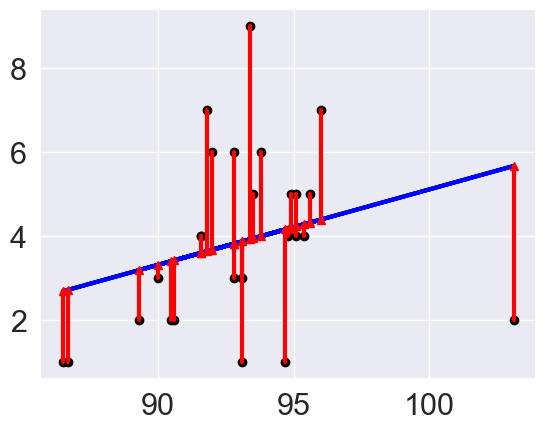

In [23]:
# plot line prediction
plt.plot(possum_X_test, possum_y_pred, color='blue', linewidth=3);

# draw vertical lines from each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3, markevery=[0], marker ='^')
                 for x, yp, yt in zip(possum_X_test, possum_y_pred, possum_y_test)];

# plot these last so they are visually on top
plt.scatter(possum_X_test, possum_y_test,  color='black');

The errors are relatively small...

Univariate linear regression seemed to produce better results. 

We can try getting even better results by experimenting with other models and optimizing them.

# DecisionTreeRegressor

In [24]:
dt = DecisionTreeRegressor()

In [25]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': list(range(2,20,2)),
    'min_weight_fraction_leaf': [0, 0.2, 0.4]
}

Parameters can greatly impact model performance (time, score, computational complexity) which is why GridSearchCV is used to identify the combination that is best for our model's performance.

In [26]:
dt_opt = model_selection.GridSearchCV(dt,param_grid,cv=10)

In [27]:
dt_opt.fit(possum_X_train, possum_y_train)

dt_df = pd.DataFrame(dt_opt.cv_results_)

In [28]:
dt_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_min_weight_fraction_leaf,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000603,0.000493,0.000506,0.000817,2,2,2,0,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",0.338055,...,-0.095329,-0.336367,0.394456,-0.435477,0.356923,0.133768,-0.360989,0.021679,0.306551,220


# Support Vector Regression(SVR)

In [29]:
svr_clf = svm.SVR()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, .75,1,2,5,7, 10]}
svr_opt = model_selection.GridSearchCV(svr_clf,param_grid,cv=10)

# optmize the svm put the CV results in a dataframe
svr_opt.fit(possum_X_train, possum_y_train)
sv_df = pd.DataFrame(svr_opt.cv_results_)

In [30]:
sv_df.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001895,0.000379,0.001409,0.000492,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",-0.382205,-0.226797,-0.244848,0.092682,0.028796,0.531889,-0.056472,0.005388,0.407976,-0.406615,-0.025021,0.2964,10


Now we'll compare the DecisionTreeRegressor with Support Vector Regression(SVR)

In [31]:
dt_df['mean_test_score'].describe()

count    405.000000
mean       0.053550
std        0.068322
min       -0.239303
25%        0.008310
50%        0.041016
75%        0.103412
max        0.134163
Name: mean_test_score, dtype: float64

In [32]:
sv_df['mean_test_score'].describe()

count    14.000000
mean     -0.025062
std       0.014532
min      -0.049044
25%      -0.032676
50%      -0.024717
75%      -0.021001
max       0.009007
Name: mean_test_score, dtype: float64

In [33]:
dt_opt.score(possum_X_test,possum_y_test), svr_opt.score(possum_X_test,possum_y_test)

(0.3024933988052324, 0.17214844119755435)

Both optimized models seemed to outperform the LinearRegression model.

In this case, the DecisionTreeRegressor model produced a slightly better score than the SVR.

We can further compare the two models to evaluate potential tradeoffs

In [35]:
dt_df['mean_fit_time'].describe()

count    405.000000
mean       0.000661
std        0.000443
min        0.000000
25%        0.000304
50%        0.000502
75%        0.001036
max        0.002487
Name: mean_fit_time, dtype: float64

In [36]:
sv_df['mean_fit_time'].describe()

count    14.000000
mean      0.003445
std       0.002348
min       0.001432
25%       0.002017
50%       0.002191
75%       0.003749
max       0.008500
Name: mean_fit_time, dtype: float64

In [38]:
dt_df['mean_score_time'].describe()

count    405.000000
mean       0.000617
std        0.000439
min        0.000000
25%        0.000279
50%        0.000462
75%        0.000982
max        0.002204
Name: mean_score_time, dtype: float64

In [37]:
sv_df['mean_score_time'].describe()

count    14.000000
mean      0.001470
std       0.000322
min       0.000850
25%       0.001275
50%       0.001493
75%       0.001641
max       0.002083
Name: mean_score_time, dtype: float64

In this case, the DecisionTreeRegressor is faster.

Fit and score times should definitely be considered when choosing models for tasks that are especially demanding.

For similar real world tasks, based on these results, I would recommend the DecisionTreeRegressor model as
it produced the higher r2 score and took the least amount of time to fit and score.